In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Load the Datasets
df = pd.read_csv('hair_fall.csv')
df1 = pd.read_csv('hairfall2.csv')
df2 = pd.read_csv('hairfall3.csv')


from sklearn.preprocessing import LabelEncoder

# Rename the column
df2.rename(columns={'Do you have hair fall problem ?': 'Hair Loss'}, inplace=True)

# List of columns to label encode
columns_to_encode = [
    'What is your name ?', 'What is your gender ?', 'Hair Loss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?',
    'Did you face any type of chronic illness in the past?', 'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?', 'Do you think that in your area water is a reason behind hair fall problems?',
    'Do you use chemicals, hair gel, or color in your hair?', 'Do you have anemia?',
    'Do you have too much stress', 'What is your food habit'
]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df2[column] = le.fit_transform(df2[column])

df2.head()

df2.drop(columns=['Timestamp', 'What is your name ?'], inplace=True)

df['Label'] = df['Hair Loss']
df1['Label'] = df1['Label']  # Already named correctly in df1


df1.rename(columns={'Age(Yrs.)': 'Age'}, inplace=True)  # Align target column name
df2.rename(columns={'What is your age ?': 'Age', 'What is your gender ?': 'Gender', 'Hair Loss': 'Label'}, inplace=True) 

In [2]:
df1['Enviromental_factor'] = df1['Radiation']

In [3]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Radiation', 'Hairline_Pattern',
       'Hairstyle', 'Density', 'Hair_Fall_Rate', 'Scalp_Infection',
       'Pain_Itch', 'Nutrition', 'Weight_Loss', 'Sleeping_Pattern',
       'Chemical_Products', 'Medication', 'Region', 'Label',
       'Enviromental_factor'],
      dtype='object')

In [4]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Label'],
      dtype='object')

In [5]:
import pandas as pd


# Renaming columns in df1
df.rename(columns={
    'Medications & Treatments': 'Medication',
    'Nutritional Deficiencies': 'Nutrition',
    'Environmental Factors': 'Enviromental_factor'
}, inplace=True)

# Renaming columns in df2
df2.rename(columns={
    'Do you have too much stress': 'Stress',
    'What is your food habit': 'Food_Habit',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Do you stay up late at night?': 'Sleeping_Pattern',
    'Do you use chemicals, hair gel, or color in your hair?':  'Chemical_Products'

}, inplace=True)



df.drop(columns=['Hair Loss','Id'], inplace=True)

df1.drop(columns=['Region','Radiation'], inplace=True)



In [6]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medication',
       'Nutrition', 'Stress', 'Age', 'Poor Hair Care Habits',
       'Enviromental_factor', 'Smoking', 'Weight Loss', 'Label'],
      dtype='object')

In [7]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor'],
      dtype='object')

In [8]:
df2.columns

Index(['Age', 'Gender', 'Label', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Sleeping_Pattern', 'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Chemical_Products', 'Do you have anemia?', 'Stress', 'Food_Habit'],
      dtype='object')

In [9]:


# Merge df1 and df2 on common columns (Age, Gender, Label, Sleeping_Pattern, Chemical_Products)
merged_df1 = pd.merge(df1, df2, on=['Age', 'Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products'], how='outer')

# Now merge the above result with df on common columns (Age, Label, Genetics, Stress)
main_data = pd.merge(merged_df1, df, on=['Age', 'Label', 'Genetics', 'Stress','Enviromental_factor','Medication','Nutrition'], how='outer')

In [10]:
main_data.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Do you have anemia?', 'Stress', 'Food_Habit', 'Hormonal Changes',
       'Medical Conditions', 'Poor Hair Care Habits', 'Smoking',
       'Weight Loss'],
      dtype='object')

In [11]:
from sklearn.utils import resample

# Assuming main_data is your merged dataset with 554 rows and 37 columns

# 1. Randomly resample (with replacement) to increase the number of rows
# Upsample to 30,000 rows using resampling

# Create a dataframe with 30000 rows by resampling with replacement
main_data = resample(main_data, 
                          replace=True,       # Sample with replacement
                          n_samples=30000,    # Increase number of rows to 30,000
                          random_state=42)    # For reproducibility

# 2. Noise Injection on Numerical Columns (e.g., Age, Genetics, Medication)
# Let's add random noise to numerical columns

numerical_columns = ['Age', 'Genetics', 'Medication', 'Enviromental_factor', 'Nutrition']  # Example numerical columns

for col in numerical_columns:
    noise = np.random.normal(0, 0.05, size=main_data[col].shape)  # Adding random noise with small standard deviation
    main_data[col] += noise  # Add the noise

# 3. For Categorical Data (Optional): Slightly modify categorical values to add variations
categorical_columns = ['Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products', 'Stress']  # Example categorical columns

for col in categorical_columns:
    main_data[col] = main_data[col].apply(lambda x: x if np.random.rand() > 0.05 else np.random.choice(main_data[col].unique()))

# Display the augmented dataset shape and a sample
print(main_data.shape)  # Should print (30000, 37)
print(main_data.head())  # Show first few rows of the augmented data


(30000, 34)
      Gender        Age  Marital_Status  Father  Mother  Grand_Father  \
860      1.0  29.999513             NaN     NaN     NaN           NaN   
1294     0.0  22.996092             NaN     NaN     NaN           NaN   
1130     0.0  28.073825             NaN     NaN     NaN           NaN   
1095     1.0  32.027568             NaN     NaN     NaN           NaN   
1638     NaN  36.942621             NaN     NaN     NaN           NaN   

      Grand_Mother  Siblings  Pregnant  Hairline_Pattern  ...  \
860            NaN       NaN       NaN               NaN  ...   
1294           NaN       NaN       NaN               NaN  ...   
1130           NaN       NaN       NaN               NaN  ...   
1095           NaN       NaN       NaN               NaN  ...   
1638           NaN       NaN       NaN               NaN  ...   

      Do you have any type of sleep disturbance?  \
860                                          1.0   
1294                                         1.0   
11

In [12]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,29.999513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1294,0.0,22.996092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1130,0.0,28.073825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1095,1.0,32.027568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1638,NaN,36.942621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.945891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
746,1.0,24.995183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1147,1.0,26.032213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1002,0.0,20.964424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [14]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,29.999513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.996092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,28.073825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,32.027568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,36.942621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.945891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
746,1.0,24.995183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1147,1.0,26.032213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1002,0.0,20.964424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0


In [15]:
main_data.drop(columns=['Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings'], inplace=True)

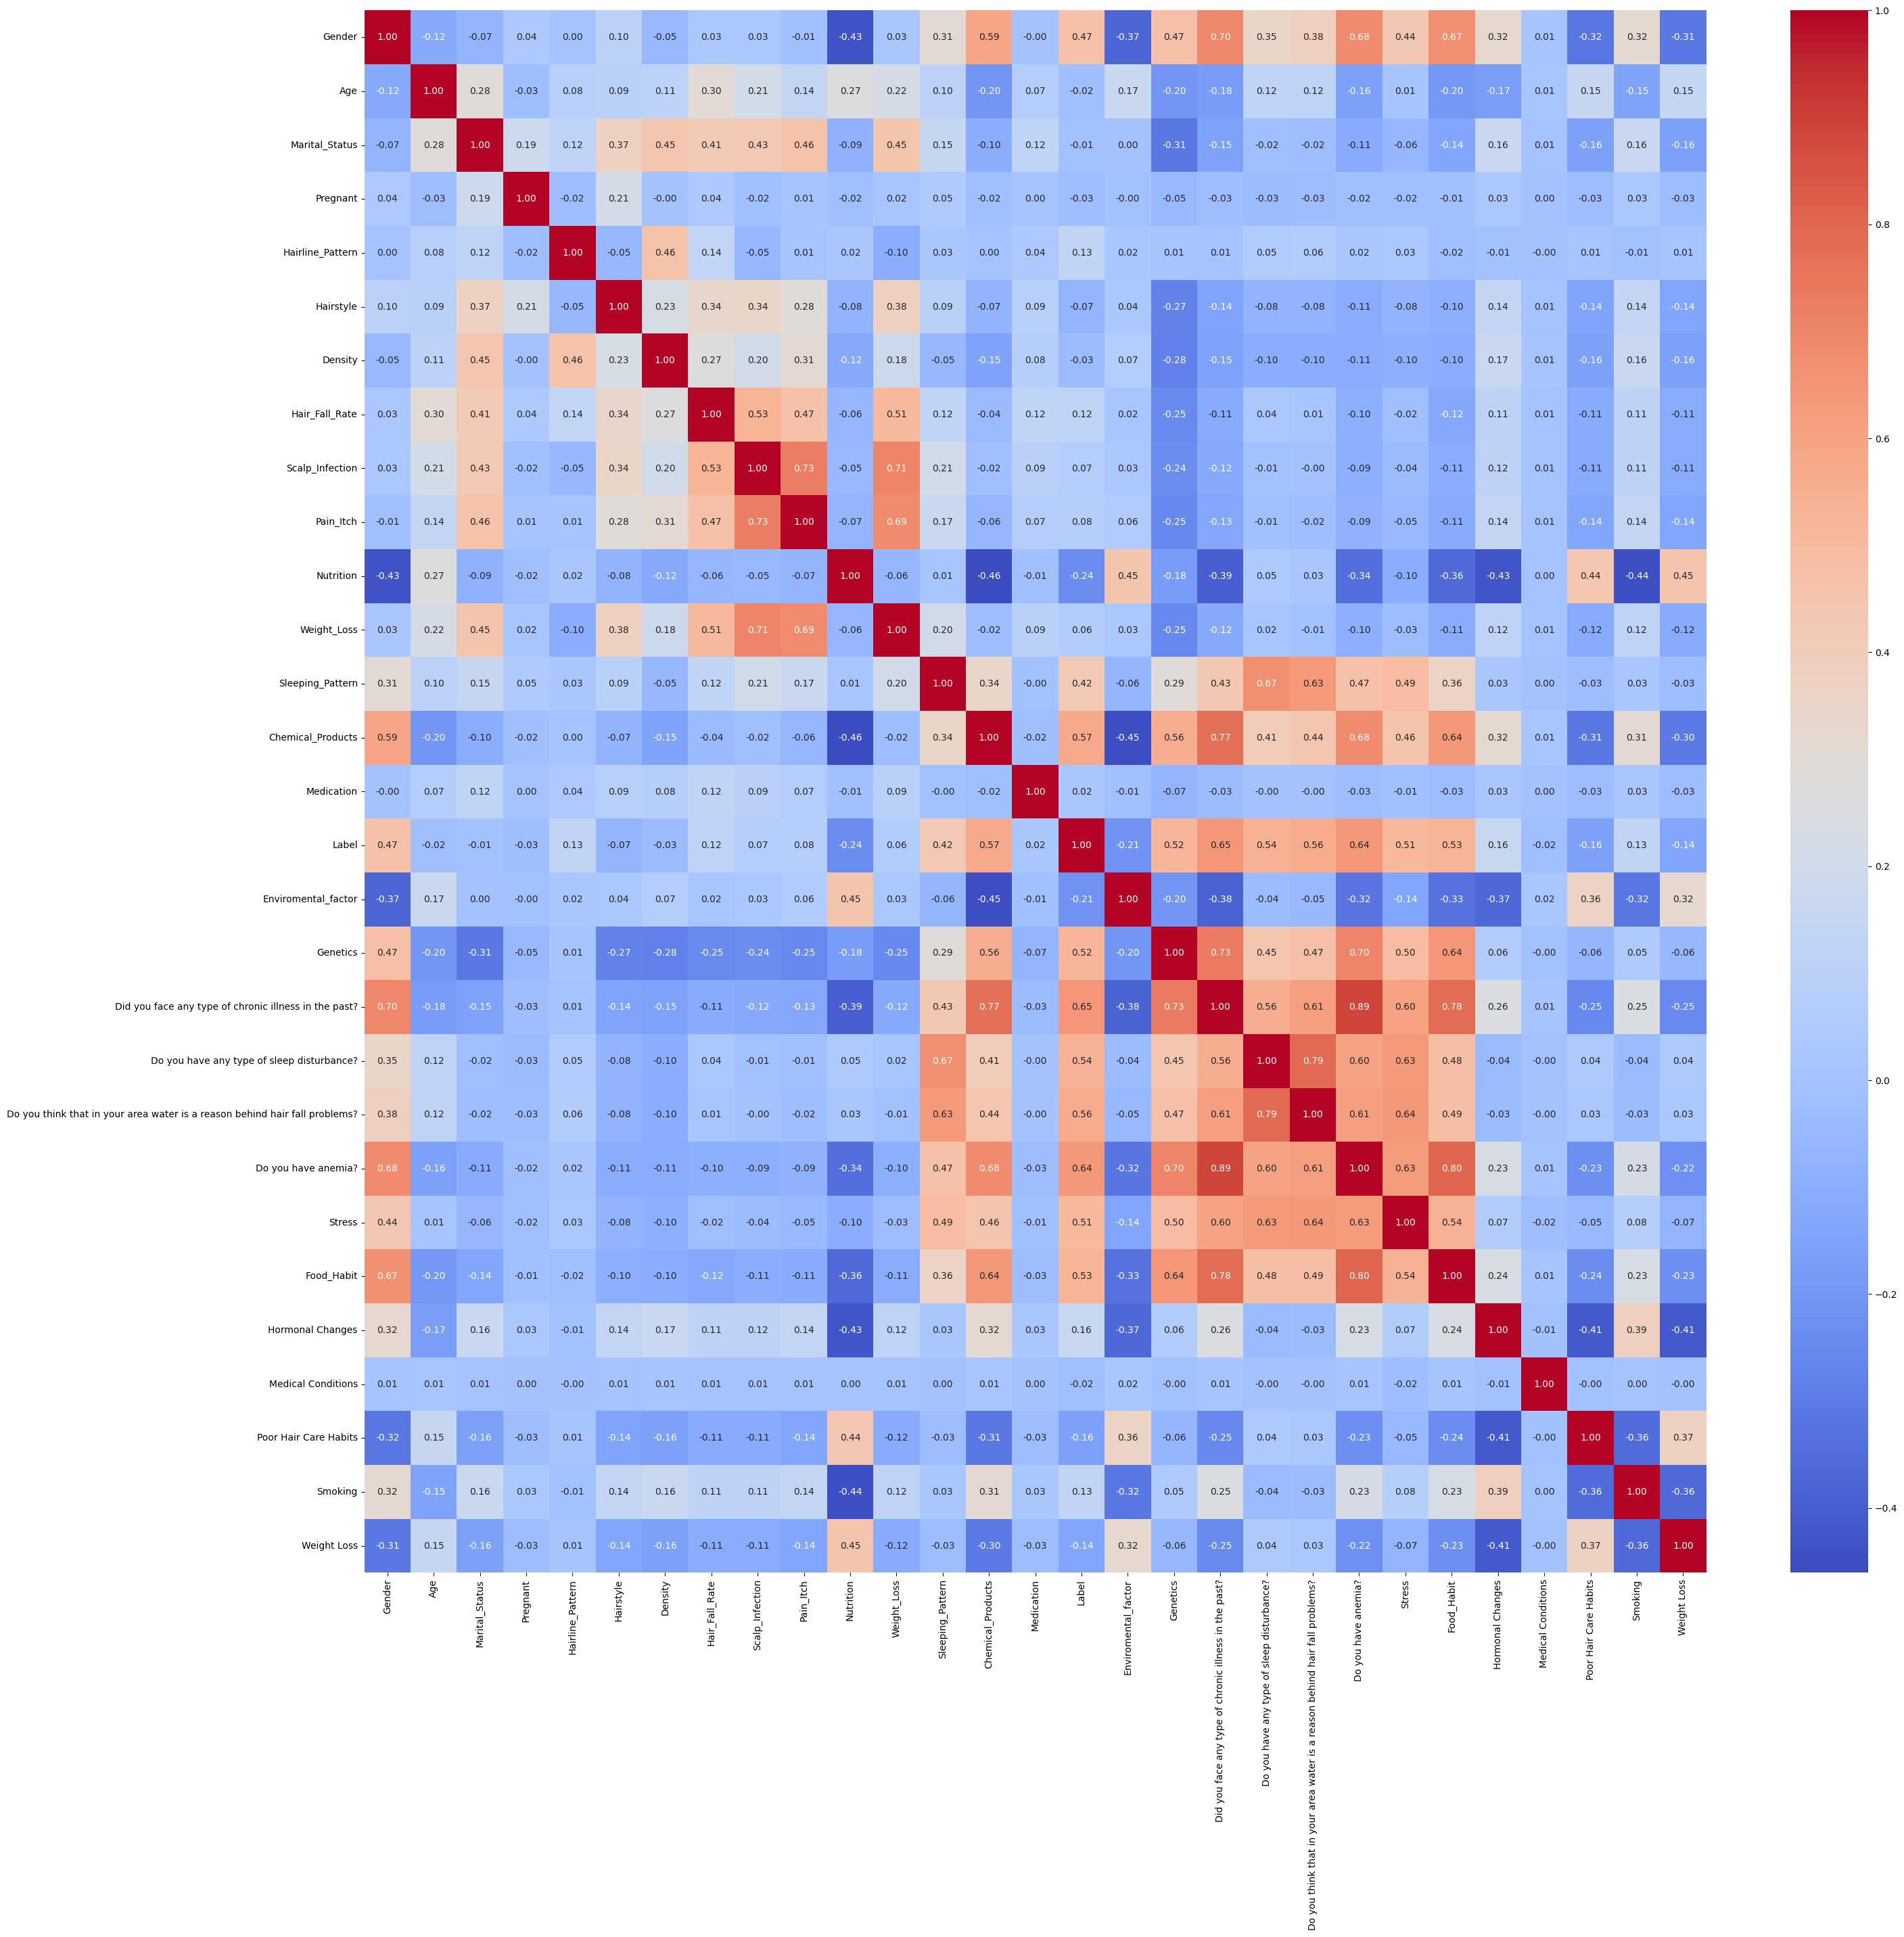

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [17]:
main_data

,Gender,Age,Marital_Status,Pregnant,Hairline_Pattern,Hairstyle,Density,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,29.999513,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.996092,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,28.073825,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,32.027568,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,36.942621,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.945891,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
746,1.0,24.995183,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1147,1.0,26.032213,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1002,0.0,20.964424,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0


In [18]:
main_data['Label'].value_counts()

1    14658
0    11699
2     3643
Name: Label, dtype: int64

In [19]:
main_data.rename(columns={
    'Marital_Status': 'Marital Status',
    'Hairline_Pattern': 'Hairline Pattern',
    'Hair_Fall_Rate': 'Hair Fall Rate',
    'Scalp_Infection': 'Scalp Infection',
    'Pain_Itch': 'Scalp Pain/Itch',
    'Sleeping_Pattern': 'Sleeping Pattern',
    'Chemical_Products': 'Chemical Product Usage',
    'Enviromental_factor': 'Environmental Factor',
    'Did you face any type of chronic illness in the past?': 'Past Chronic Illness',
    'Do you have any type of sleep disturbance?': 'Sleep Disturbance',
    'Do you think that in your area water is a reason behind hair fall problems?': 'Water Quality Issue',
    'Do you have anemia?': 'Anemia',
    'Food_Habit': 'Food Habit',
    'Poor Hair Care Habits': 'Hair Care Habits'
}, inplace=True)

In [20]:
# Calculate the correlation of each column with the label
correlation_with_label = main_data.corr()['Label'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_label)

Label                     1.000000
Past Chronic Illness      0.645096
Anemia                    0.636948
Chemical Product Usage    0.574327
Water Quality Issue       0.562834
Sleep Disturbance         0.538523
Food Habit                0.531969
Genetics                  0.522385
Stress                    0.510541
Gender                    0.466787
Sleeping Pattern          0.424684
Hormonal Changes          0.156262
Smoking                   0.131076
Hairline Pattern          0.128933
Hair Fall Rate            0.120700
Scalp Pain/Itch           0.075796
Scalp Infection           0.071070
Weight_Loss               0.063102
Medication                0.020213
Marital Status           -0.008716
Age                      -0.020090
Medical Conditions       -0.020236
Pregnant                 -0.025001
Density                  -0.033958
Hairstyle                -0.070689
Weight Loss              -0.135919
Hair Care Habits         -0.158286
Environmental Factor     -0.213700
Nutrition           

In [21]:
# Dropping unnecessary columns
columns_to_drop = ['Marital Status', 'Environmental Factor', 'Sleeping Pattern', 
                   'Scalp Pain/Itch', 'Anemia', 'Medical Conditions', 'Medication','Weight_Loss','Hairstyle','Pregnant']

# Ensure only one "Weight Loss" column is removed (if duplicate exists)
if 'Weight Loss' in main_data.columns:
    columns_to_drop.append('Weight Loss')  # Add only if it exists

# Drop the columns safely
main_data.drop(columns=columns_to_drop, inplace=True)


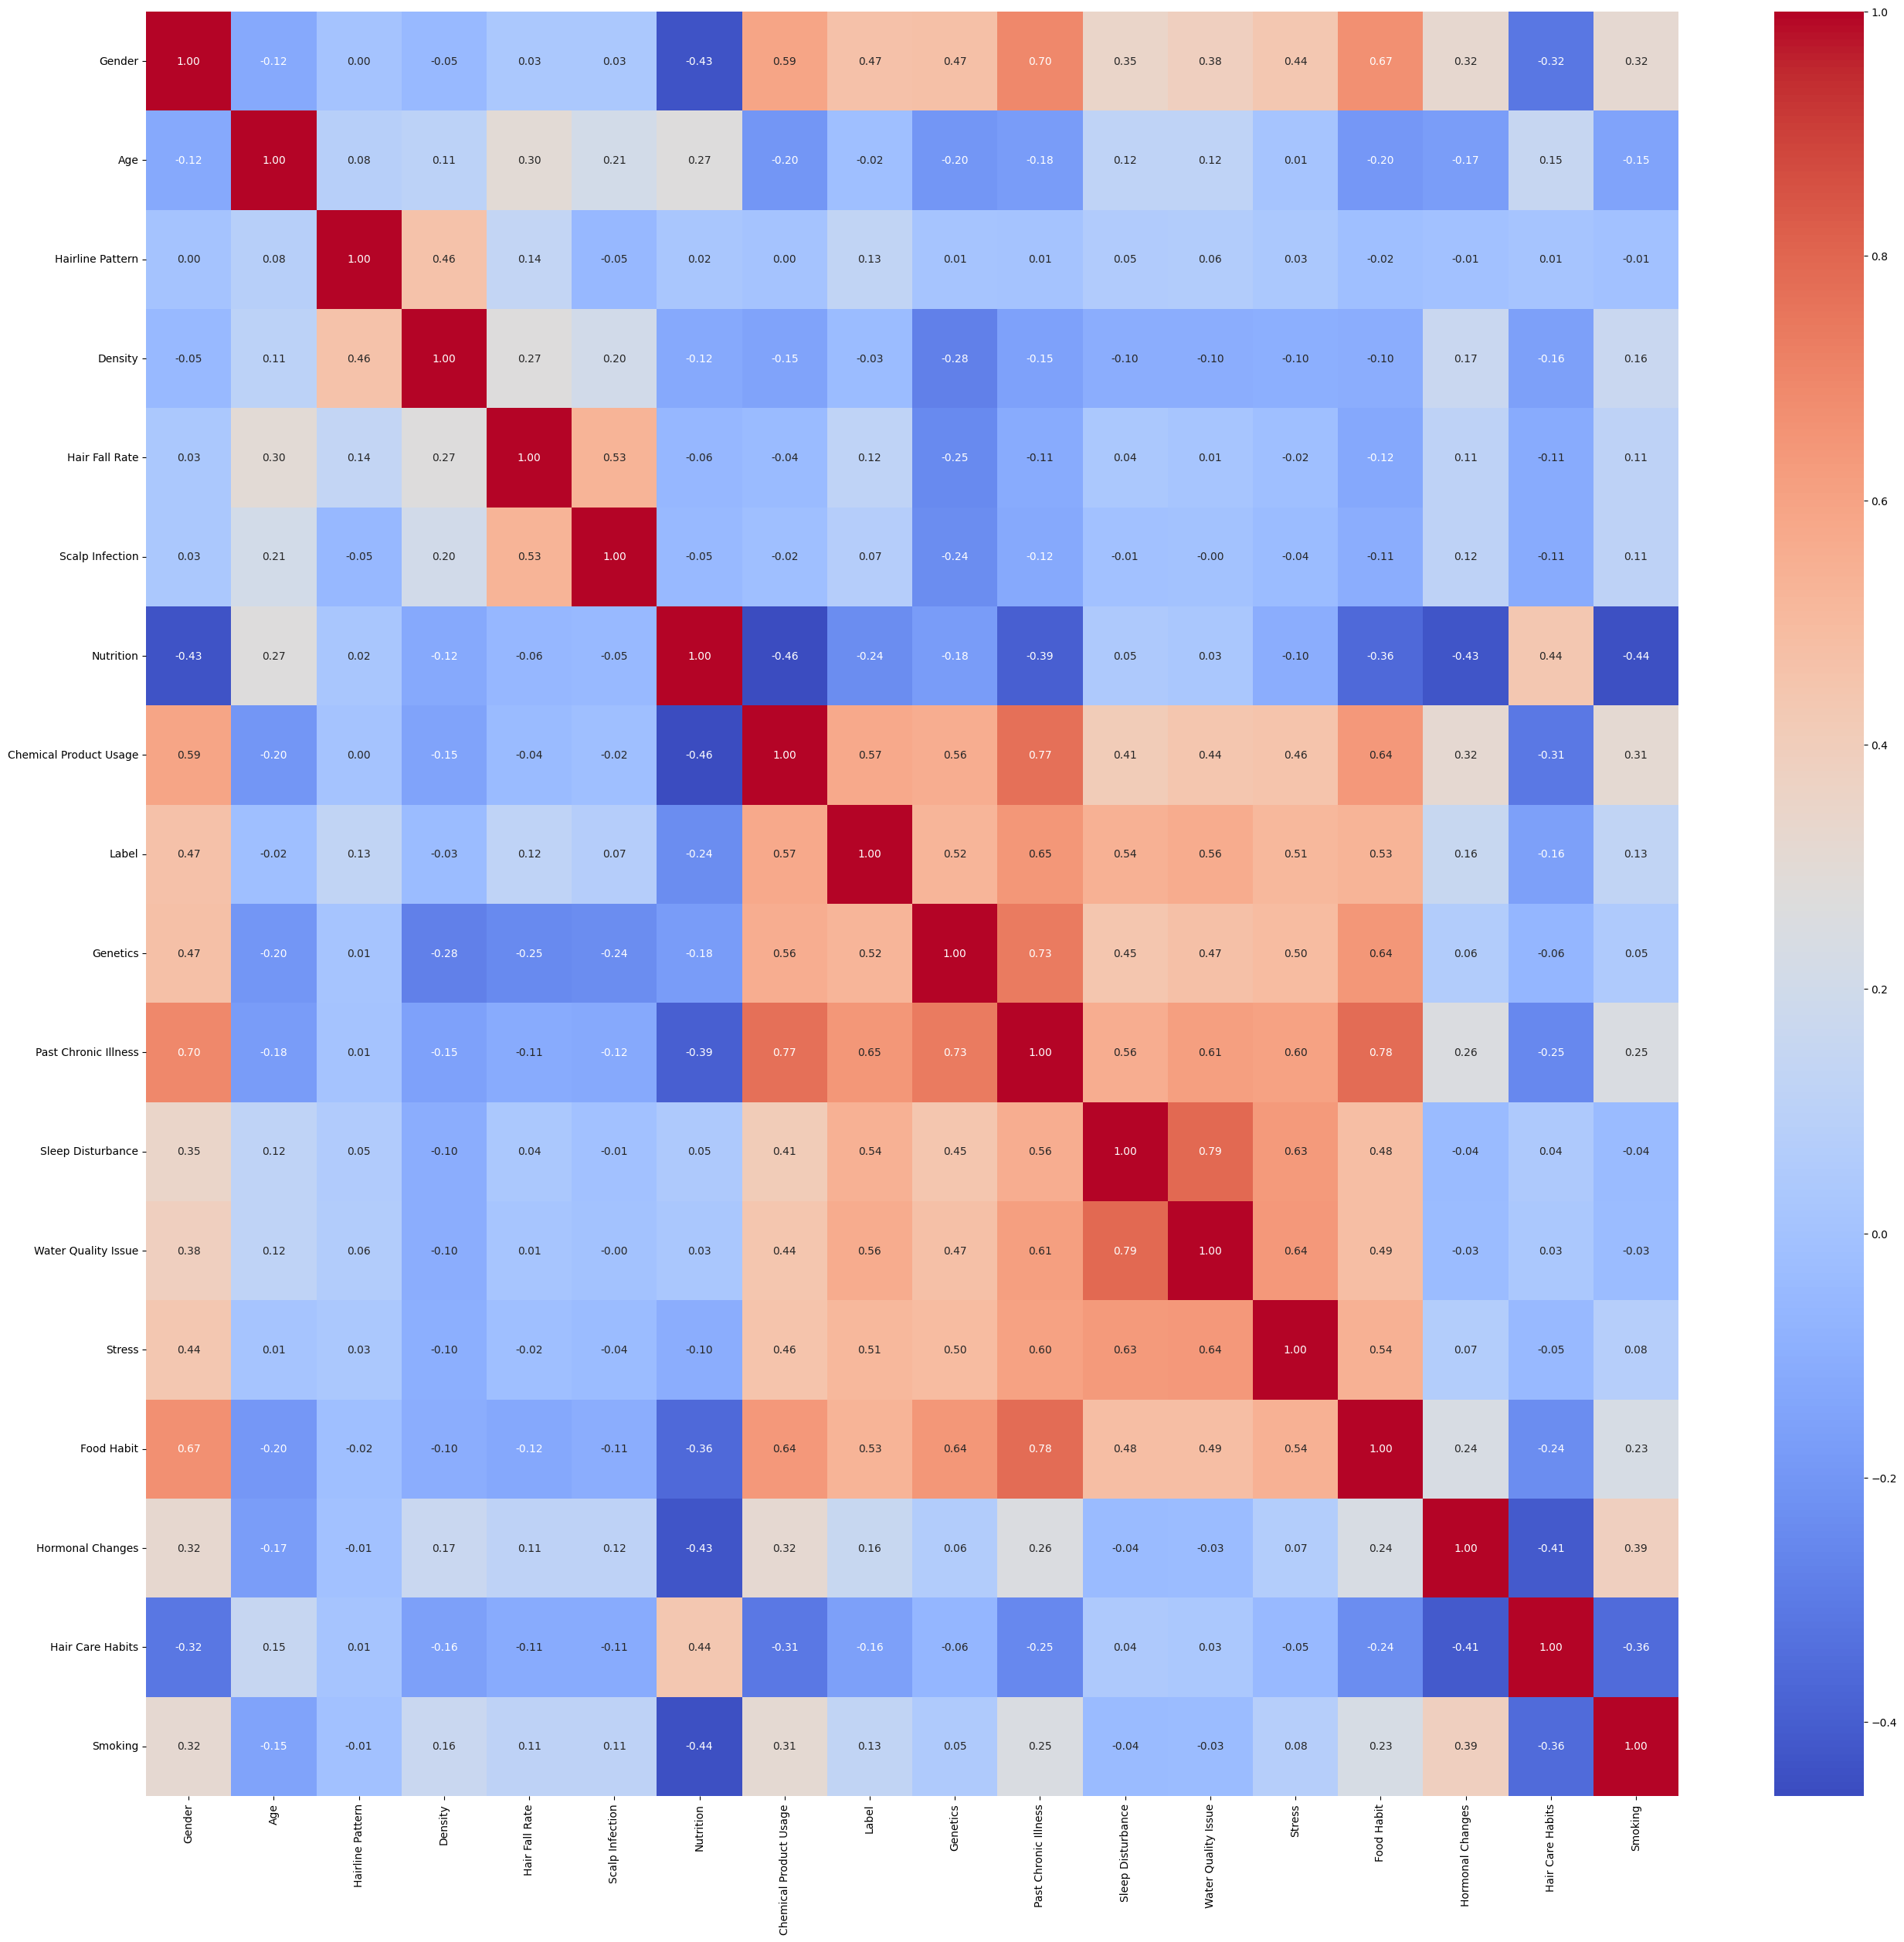

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [23]:
main_data = main_data.astype(int)
main_data.dtypes

Gender                    int32
Age                       int32
Hairline Pattern          int32
Density                   int32
Hair Fall Rate            int32
Scalp Infection           int32
Nutrition                 int32
Chemical Product Usage    int32
Label                     int32
Genetics                  int32
Past Chronic Illness      int32
Sleep Disturbance         int32
Water Quality Issue       int32
Stress                    int32
Food Habit                int32
Hormonal Changes          int32
Hair Care Habits          int32
Smoking                   int32
dtype: object

In [24]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [25]:
main_data['Hair Fall Rate'].value_counts()

52     21946
40      1353
252      713
50       483
20       437
       ...  
126        7
178        7
210        5
87         4
362        4
Name: Hair Fall Rate, Length: 147, dtype: int64

In [26]:
main_data['Label'].value_counts()

1    14658
0    11699
2     3643
Name: Label, dtype: int64

In [27]:
main_data

,Gender,Age,Hairline Pattern,Density,Hair Fall Rate,Scalp Infection,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
860,1,29,1,0,52,0,0,0,1,0,1,1,1,1,2,1,0,1
1294,0,22,1,0,52,0,0,2,1,0,0,1,0,0,0,1,0,1
1130,0,28,1,0,52,0,0,2,1,1,0,0,1,1,0,1,0,1
1095,1,32,1,0,52,0,0,0,1,0,1,1,1,1,2,1,0,1
1638,0,36,1,0,52,0,8,0,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,18,1,0,52,0,0,2,0,0,0,0,0,0,0,1,0,1
746,1,24,1,0,52,0,0,2,1,0,1,1,1,1,0,1,0,1
1147,1,26,1,0,52,0,0,2,1,1,0,1,1,1,0,1,0,1
1002,0,20,1,0,52,0,0,2,1,0,1,1,1,1,0,1,0,1


In [28]:
main_data.to_csv('final_data.csv', index=False)

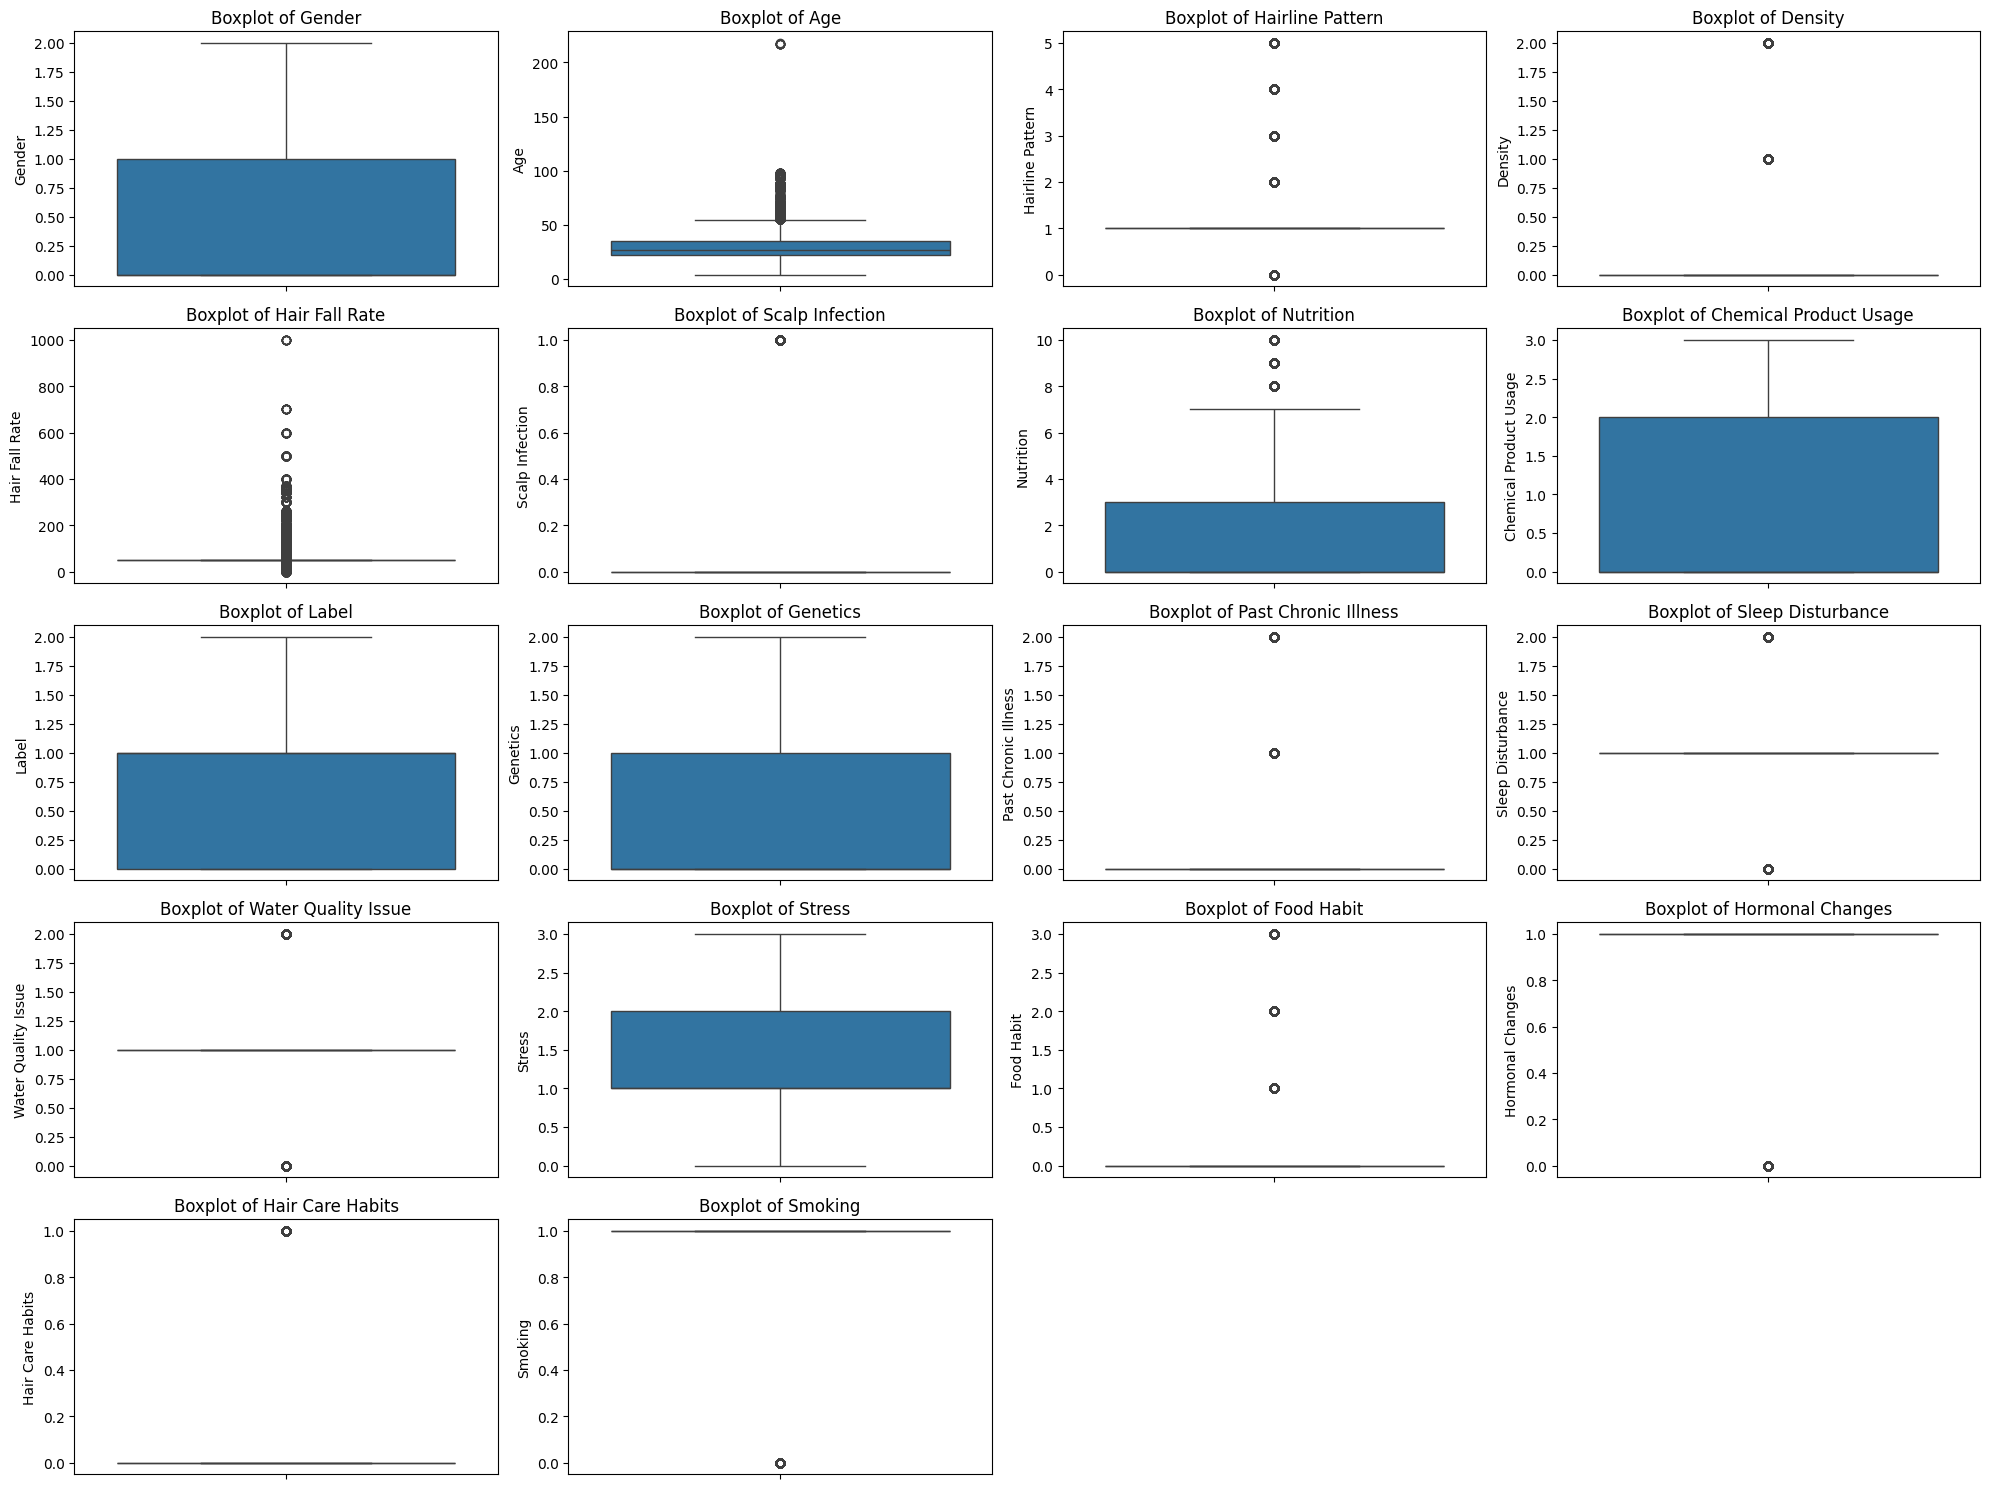

In [29]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a boxplot for each column
for i, column in enumerate(main_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=main_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

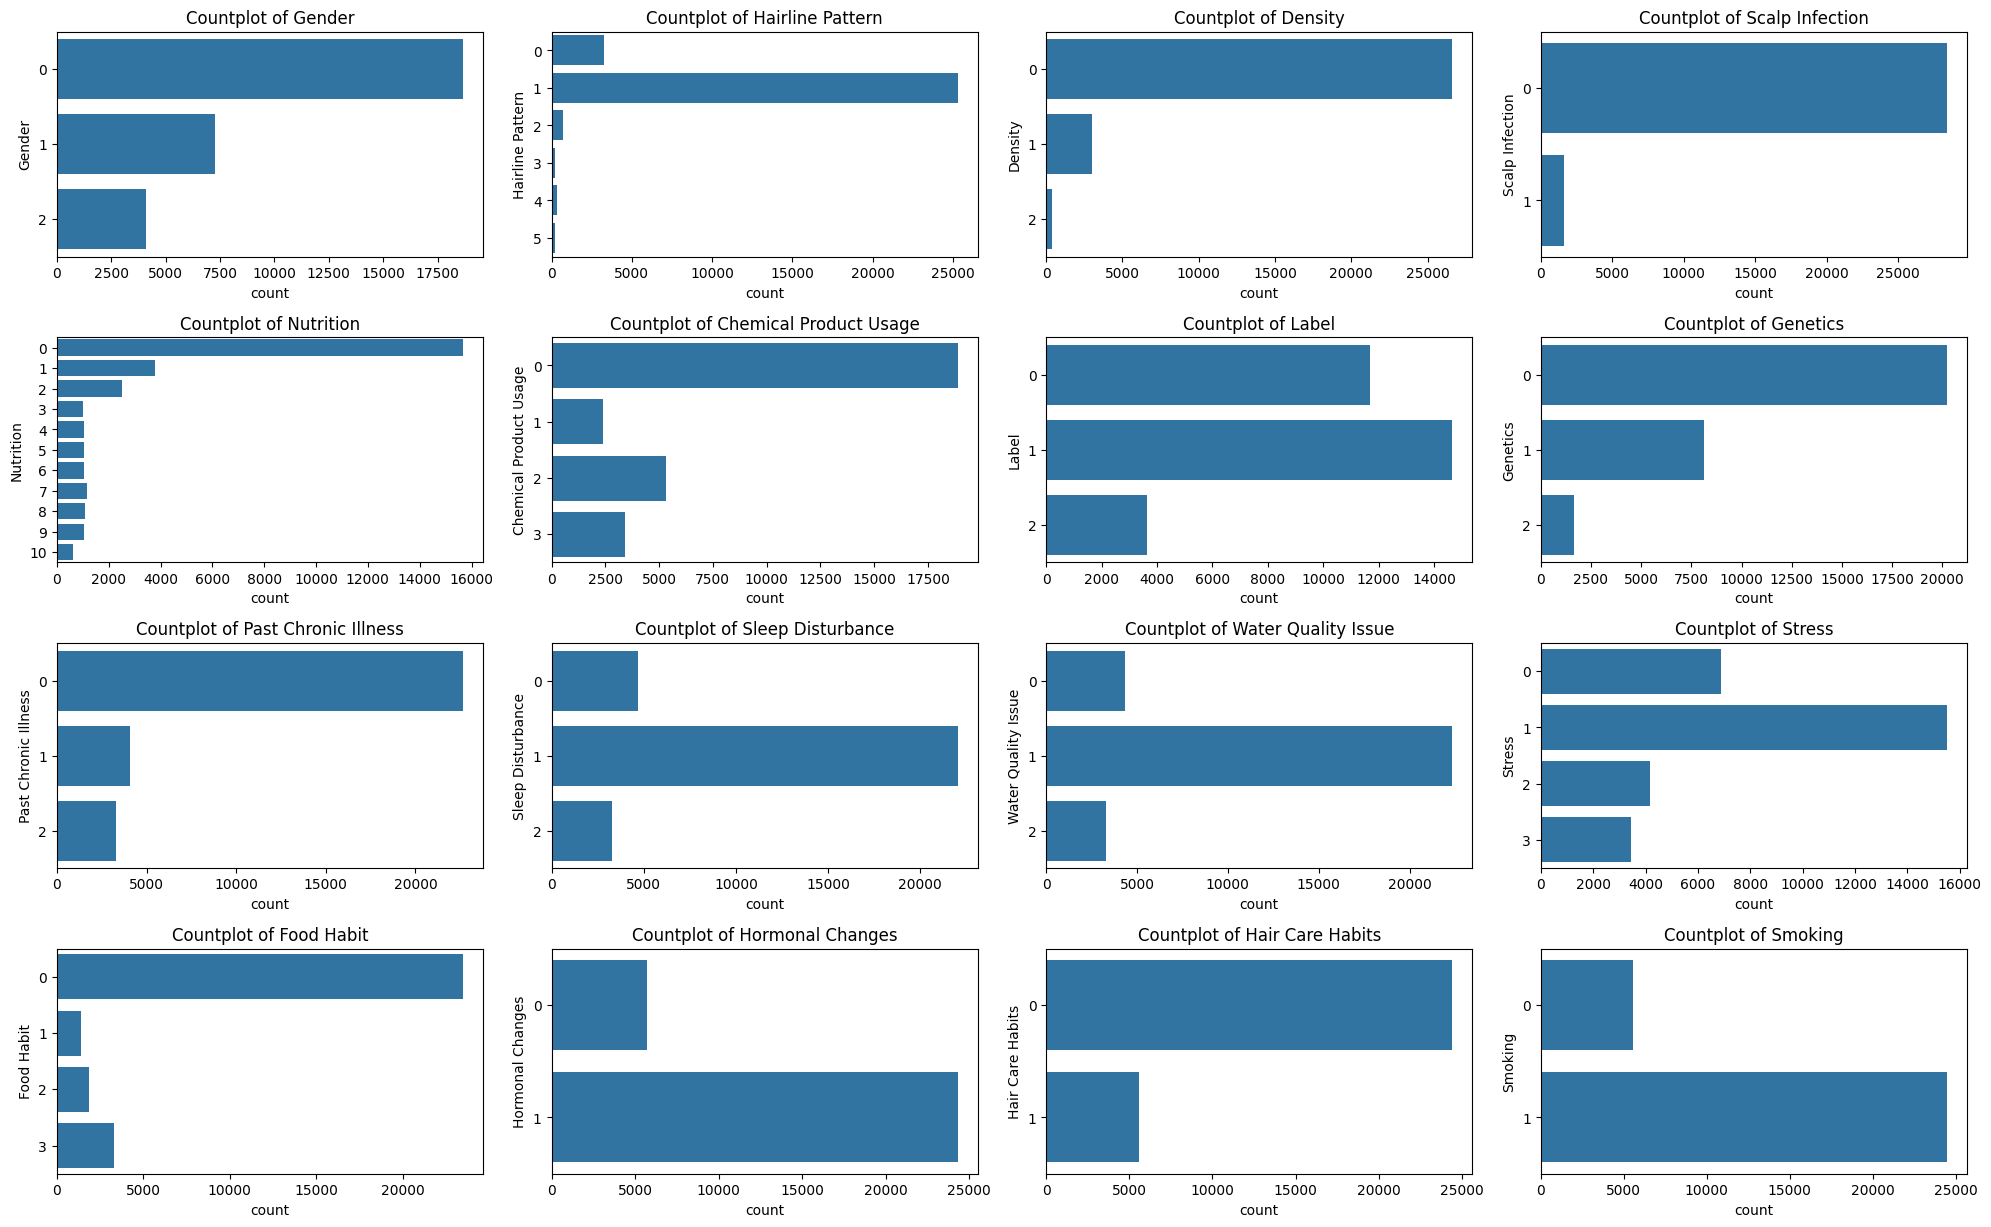

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [col for col in main_data.columns if col not in ['Age', 'Hair Fall Rate']]

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.countplot(y=main_data[column])
    plt.title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

In [31]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [32]:
main_data.drop(columns=['Scalp Infection', 'Density'], inplace=True)

In [33]:
main_data['Label'].value_counts()

1    14658
0    11699
2     3643
Name: Label, dtype: int64

In [34]:
main_data = main_data.astype(int)   
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
860,1,29,1,52,0,0,1,0,1,1,1,1,2,1,0,1
1294,0,22,1,52,0,2,1,0,0,1,0,0,0,1,0,1
1130,0,28,1,52,0,2,1,1,0,0,1,1,0,1,0,1
1095,1,32,1,52,0,0,1,0,1,1,1,1,2,1,0,1
1638,0,36,1,52,8,0,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,18,1,52,0,2,0,0,0,0,0,0,0,1,0,1
746,1,24,1,52,0,2,1,0,1,1,1,1,0,1,0,1
1147,1,26,1,52,0,2,1,1,0,1,1,1,0,1,0,1
1002,0,20,1,52,0,2,1,0,1,1,1,1,0,1,0,1


In [35]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 860 to 2021
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  30000 non-null  int32
 1   Age                     30000 non-null  int32
 2   Hairline Pattern        30000 non-null  int32
 3   Hair Fall Rate          30000 non-null  int32
 4   Nutrition               30000 non-null  int32
 5   Chemical Product Usage  30000 non-null  int32
 6   Label                   30000 non-null  int32
 7   Genetics                30000 non-null  int32
 8   Past Chronic Illness    30000 non-null  int32
 9   Sleep Disturbance       30000 non-null  int32
 10  Water Quality Issue     30000 non-null  int32
 11  Stress                  30000 non-null  int32
 12  Food Habit              30000 non-null  int32
 13  Hormonal Changes        30000 non-null  int32
 14  Hair Care Habits        30000 non-null  int32
 15  Smoking           

In [36]:
main_data['Hairline Pattern'] = main_data['Hairline Pattern'] * 2
main_data['Chemical Product Usage'] = main_data['Chemical Product Usage'] * 1.5
main_data['Genetics'] = main_data['Genetics'] * 1.5
main_data['Past Chronic Illness'] = main_data['Past Chronic Illness'] * 1.5
main_data['Hair Care Habits'] = main_data['Hair Care Habits'] * 1.2


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Important Features (Assigning Higher Weights)
feature_weights = {
    'Hair Fall Rate': 19,  # Very Important Feature
    'Genetics': 2,  # Important
    'Stress': 2,  # Important
    'Hormonal Changes': 2,  # Important
    'Sleep Disturbance': 2,  # Important
}

# Prepare Features and Target
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# Apply feature importance weights (Multiply Selected Columns)
for feature, weight in feature_weights.items():
    if feature in X.columns:
        X[feature] = X[feature] * weight  # Boost its value

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

# Show feature importances
importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(X.columns, importances))

print("Feature Importances:", feature_importance_dict)

Validation Accuracy: 0.8940
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1106
           1       0.92      0.89      0.91      1537
           2       0.90      0.89      0.89       357

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Test Accuracy: 0.8893
Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1095
           1       0.91      0.89      0.90      1511
           2       0.91      0.89      0.90       394

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Feature Importances: {'Gender': 0.03776141065851404, 'Age': 0.1831565912414106, 'Hairline Pattern': 0.02191536581913475, 'Hair

In [38]:
y_train_resampled.value_counts()

2    11610
0    11610
1    11610
Name: Label, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Prepare Features and Target
X = main_data.drop(['Age'], axis=1)  # Features (assuming 'Age_Of_Onset' is your target)
y = main_data['Age']  # Target variable for age prediction



# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    
)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_regressor.predict(X_val)

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

# Display the results for the validation set
print("Validation Set Metrics:")
print(f"Mean Squared Error: {val_mse:.2f}")
print(f"Root Mean Squared Error: {val_rmse:.2f}")
print(f"R² Score: {val_r2:.4f}")

# Calculate Mean Absolute Error



error = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error: {error}")


# Predict on the test set
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results for the test set
print("\nTest Set Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error: {test_mae:.2f}")

# Show feature importances
importances = rf_regressor.feature_importances_
feature_importance_dict = dict(zip(X.columns, importances))

# Sort and display feature importances
sorted_importances = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
print("\nFeature Importances:")
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")

Validation Set Metrics:
Mean Squared Error: 45.86
Root Mean Squared Error: 6.77
R² Score: 0.6665
Mean Absolute Error: 3.9997833360857546

Test Set Metrics:
Mean Squared Error: 45.26
Root Mean Squared Error: 6.73
R² Score: 0.6648
Mean Absolute Error: 3.96

Feature Importances:
Hair Fall Rate: 0.3807
Nutrition: 0.1981
Hairline Pattern: 0.0987
Gender: 0.0629
Chemical Product Usage: 0.0493
Label: 0.0469
Stress: 0.0416
Water Quality Issue: 0.0300
Genetics: 0.0224
Hair Care Habits: 0.0161
Smoking: 0.0148
Hormonal Changes: 0.0146
Food Habit: 0.0087
Past Chronic Illness: 0.0078
Sleep Disturbance: 0.0074


In [40]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Define parameter grid with corrected max_features values
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]  # Removed 'auto' as it's no longer supported
# }

# # Initialize base Random Forest model
# rf_base = RandomForestRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=rf_base,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     error_score='raise'  # This will help identify any other potential issues
# )

# # Fit GridSearchCV using training data
# grid_search.fit(X_train, y_train)

# # Get best model
# best_model = grid_search.best_estimator_

# # Evaluate on test set
# y_test_pred = best_model.predict(X_test)

# # Calculate metrics
# test_mse = mean_squared_error(y_test, y_test_pred)
# test_rmse = np.sqrt(test_mse)
# test_r2 = r2_score(y_test, y_test_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)

# # Print best parameters
# print("\nBest Parameters:")
# for param, value in grid_search.best_params_.items():
#     print(f"{param}: {value}")

# # Print test set metrics
# print("\nTest Set Metrics:")
# print(f"Mean Squared Error: {test_mse:.2f}")
# print(f"Root Mean Squared Error: {test_rmse:.2f}")
# print(f"R² Score: {test_r2:.4f}")
# print(f"Mean Absolute Error: {test_mae:.2f}")

# # Get and print feature importances
# importances = best_model.feature_importances_
# feature_importance_dict = dict(zip(X_test.columns, importances))
# sorted_importances = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# print("\nFeature Importances:")
# for feature, importance in sorted_importances.items():
#     print(f"{feature}: {importance:.4f}")

In [41]:
X_train_resampled

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
0,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
1,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
2,0,48,2,988,4,0.0,3.0,0.0,2,1,4,0,0,0.0,1
3,1,19,2,988,0,3.0,0.0,0.0,2,1,2,2,2,0.0,1
4,1,56,0,1900,0,0.0,0.0,0.0,2,1,2,0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34825,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
34826,2,27,2,988,0,4.5,3.0,3.0,4,2,6,3,2,0.0,1
34827,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
34828,0,27,2,988,0,4.5,6.0,3.0,4,2,4,3,2,0.0,1


In [42]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi = mutual_info_classif(X_train_resampled, y_train_resampled)

# Display MI Scores
for feature, score in zip(X_train_resampled.columns, mi):
    print(f"Feature: {feature}, MI Score: {score}")

Feature: Gender, MI Score: 0.3776654638230592
Feature: Age, MI Score: 0.417774013982404
Feature: Hairline Pattern, MI Score: 0.05272950464222781
Feature: Hair Fall Rate, MI Score: 0.14821108735490784
Feature: Nutrition, MI Score: 0.1379958860917927
Feature: Chemical Product Usage, MI Score: 0.45463875530672015
Feature: Genetics, MI Score: 0.29665311165506614
Feature: Past Chronic Illness, MI Score: 0.5013208374320559
Feature: Sleep Disturbance, MI Score: 0.4795482046185482
Feature: Water Quality Issue, MI Score: 0.4755522232340115
Feature: Stress, MI Score: 0.4291186782182945
Feature: Food Habit, MI Score: 0.47093681859448444
Feature: Hormonal Changes, MI Score: 0.048196296652359694
Feature: Hair Care Habits, MI Score: 0.05323283219216868
Feature: Smoking, MI Score: 0.036374834366254216


In [43]:

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),  # Base classifier
#     param_grid=param_grid_rf,
#     cv=3,  # 3-fold cross-validation on the training set
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit GridSearchCV on the resampled training data
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Print the best parameters and best score (from cross-validation on the training set)
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best Cross-Validation Accuracy (on Training Set):", grid_search_rf.best_score_)

# # Get the best model from GridSearchCV
# best_rf_model = grid_search_rf.best_estimator_

# # Evaluate the best model on the validation set
# y_val_pred = best_rf_model.predict(X_val)
# print("Validation Set Results:")
# print("Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Classification Report:\n", classification_report(y_val, y_val_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# # Evaluate the best model on the test set
# y_test_pred = best_rf_model.predict(X_test)
# print("Test Set Results:")
# print("Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [44]:
main_data['Hair Fall Rate'].value_counts()

52     21946
40      1353
252      713
50       483
20       437
       ...  
126        7
178        7
210        5
87         4
362        4
Name: Hair Fall Rate, Length: 147, dtype: int64

In [45]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top important features
print(feature_importance)

                   Feature  Importance
1         Hairline Pattern    0.183157
8        Sleep Disturbance    0.107224
7     Past Chronic Illness    0.102577
9      Water Quality Issue    0.102181
5                    Label    0.085284
11              Food Habit    0.082377
3                Nutrition    0.073139
10                  Stress    0.066848
4   Chemical Product Usage    0.066004
0                   Gender    0.037761
6                 Genetics    0.030138
2           Hair Fall Rate    0.021915
13        Hair Care Habits    0.017555
12        Hormonal Changes    0.013583
14                 Smoking    0.010256


In [46]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
       'Chemical Product Usage', 'Label', 'Genetics', 'Past Chronic Illness',
       'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
       'Hormonal Changes', 'Hair Care Habits', 'Smoking'],
      dtype='object')

### Using XGB BOOST

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

Validation Accuracy: 0.8633
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1106
           1       0.89      0.85      0.87      1537
           2       0.97      0.89      0.93       357

    accuracy                           0.86      3000
   macro avg       0.89      0.87      0.88      3000
weighted avg       0.87      0.86      0.86      3000

Test Accuracy: 0.8676
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1511
           1       0.86      0.85      0.86      1511
           2       0.92      0.94      0.93      1511

    accuracy                           0.87      4533
   macro avg       0.87      0.87      0.87      4533
weighted avg       0.87      0.87      0.87      4533



In [48]:
main_data[main_data['Label'] == 2]

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
1482,2,27,2,52,0,3.0,2,1.5,3.0,2,2,3,3,1,0.0,1
1515,2,27,2,52,0,4.5,2,3.0,3.0,2,2,2,3,1,0.0,1
1528,2,27,2,52,0,4.5,2,3.0,3.0,2,2,3,3,1,0.0,1
1363,2,27,2,52,0,4.5,2,1.5,3.0,2,2,3,3,1,0.0,1
1390,2,27,2,52,0,4.5,2,1.5,3.0,2,2,3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,2,27,2,52,0,4.5,2,1.5,3.0,2,2,3,3,1,0.0,1
1595,2,27,2,52,0,4.5,2,3.0,3.0,2,2,3,3,1,0.0,1
1561,2,27,2,52,0,4.5,2,1.5,3.0,2,2,3,3,1,0.0,1
1430,2,27,2,52,0,4.5,2,1.5,3.0,2,2,3,3,1,0.0,1


In [49]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
860,1,29,2,52,0,0.0,1,0.0,1.5,1,1,1,2,1,0.0,1
1294,0,22,2,52,0,3.0,1,0.0,0.0,1,0,0,0,1,0.0,1
1130,0,28,2,52,0,3.0,1,1.5,0.0,0,1,1,0,1,0.0,1
1095,1,32,2,52,0,0.0,1,0.0,1.5,1,1,1,2,1,0.0,1
1638,0,36,2,52,8,0.0,1,0.0,0.0,1,1,0,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,18,2,52,0,3.0,0,0.0,0.0,0,0,0,0,1,0.0,1
746,1,24,2,52,0,3.0,1,0.0,1.5,1,1,1,0,1,0.0,1
1147,1,26,2,52,0,3.0,1,1.5,0.0,1,1,1,0,1,0.0,1
1002,0,20,2,52,0,3.0,1,0.0,1.5,1,1,1,0,1,0.0,1


## PREDICTION


In [50]:

def get_user_input():
    user_input = {}
    
    print("Please enter the following details:")

    user_input['Gender'] = int(input("Gender (0: Female, 1: Male, 2: Other): "))
    user_input['Age'] = int(input("Current Age (e.g., 22, 23, etc.): "))
    user_input['Hairline Pattern'] = int(input("Hairline Pattern (0: Normal, 1: Receding, 2, 3, 4, 5: Other variations): "))
    user_input['Hair Fall Rate'] = float(input("Hair Fall Rate (e.g., 50 strands per day): "))
    user_input['Nutrition'] = float(input("Nutrition Level (1-10, 10 being excellent): "))
    user_input['Chemical Product Usage'] = int(input("Chemical Product Usage (0: No, 1, 2, 3: Varying levels of use): "))
    user_input['Genetics'] = int(input("Family History of Hair Loss (0: No, 1: Yes, 2: yes ): "))
    user_input['Past Chronic Illness'] = int(input("Past Chronic Illness (0: No, 1: Yes, 2: Severe): "))
    user_input['Sleep Disturbance'] = int(input("Sleep Disturbance (0: No, 1: Yes, 2: Severe issues): "))
    user_input['Water Quality Issue'] = int(input("Poor Water Quality (0: No, 1: Yes, 2: Very bad): "))
    user_input['Stress'] = int(input("Stress Levels (0: Low, 1: Medium, 2: High, 3: Extreme): "))
    user_input['Food Habit'] = int(input("Food Habit (0: Healthy, 1: Unhealthy, 2: Junk food, 3: Worst diet): "))
    user_input['Hormonal Changes'] = int(input("Hormonal Imbalance (0: No, 1: Yes): "))
    user_input['Hair Care Habits'] = int(input("Poor Hair Care Habits (0: No, 1: Yes): "))
    user_input['Smoking'] = int(input("Smoking (0: No, 1: Yes): "))

    return user_input


def adjust_age_based_on_features(user_input, predicted_age):
    # Adjusting the predicted age based on the high-importance features
    weight_factors = {
        "Chemical Product Usage": 1.4,  # This could be a factor to increase the age slightly
        "Genetics": 1.3,  # Higher weight for family history
        "Past Chronic Illness": 1.1,  # Slight adjustment if there's a history of illness
        "Sleep Disturbance": 1.2,  # Sleep disturbance increases the risk slightly
        "Water Quality Issue": 1.1,  # Water quality issue could also slightly increase age prediction
        "Stress": 1.2,  # Stress can accelerate hair fall, so adjust accordingly
        "Food Habit": 1.3  # Poor food habits could accelerate hair loss
    }
    
    adjusted_age = predicted_age
    for feature, weight in weight_factors.items():
        if user_input[feature] == 2:  # Higher value means worse factor (e.g., 2 for high usage or poor quality)
            adjusted_age += 1  # You can modify this factor based on how much influence you want to give each feature
    
    return adjusted_age

def predict_hair_fall_risk(model, scaler, X_train_resampled, y_train_resampled):
    # Get user input details
    user_input = get_user_input()  # Assume a function to collect user input as before

    # Define the feature order
    feature_order = ['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
                     'Chemical Product Usage', 'Genetics', 'Past Chronic Illness',
                     'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
                     'Hormonal Changes', 'Hair Care Habits', 'Smoking']
    
    # Prepare the user input as a feature array
    user_data = np.array([[user_input[feature] for feature in feature_order]])
    
    # Scale user input if a scaler is provided
    if scaler:
        user_data = scaler.transform(user_data)

    # Make prediction for risk level
    prediction = model.predict(user_data)[0]
    
    # Map the prediction to risk level (0 = Low, 1 = Medium, 2 = High)
    risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
    risk_level = risk_mapping.get(prediction, "Unknown")

    # Now, using the 'Label' column from y_train_resampled to predict the age when hair loss might start
    user_age = user_input["Age"]
    
    if risk_level in ["High Risk", "Medium Risk"]:
        # Filter the dataset based on the predicted risk level (using y_train_resampled and X_train_resampled)
        risk_ages = X_train_resampled[y_train_resampled == prediction]['Age']
        
        # Calculate the average age for people in that risk category
        avg_age = risk_ages.mean()  # Average age of people who experienced the same risk level

        # For Medium Risk, calculate average first, then add 5 years
        if risk_level == "Medium Risk":
            predicted_age = (avg_age + user_age) / 2  # First calculate average
            predicted_age += 5  # Then add 5 years to the predicted age

        # For High Risk, calculate without any additional years
        elif risk_level == "High Risk":
            predicted_age = (avg_age + user_age) / 2

        # Adjust age based on important features
        adjusted_age = adjust_age_based_on_features(user_input, predicted_age)

        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print(f"Estimated Age When Hair Fall Might Start: {adjusted_age:.2f}")
        years = int(adjusted_age)
        months = round((adjusted_age - years) * 12)
        print(f"Estimated Age When Hair Fall Might Start: {years} years and {months} months")
    
    else:
        # For low risk, no prediction is required.
        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print("No significant risk predicted for hair fall. However, it's important to care for your hair health to avoid future problems.")
    return risk_level
        

In [ ]:
predict_hair_fall_risk(rf_classifier, None, X_train_resampled, y_train_resampled)

Please enter the following details:


### Age prediction another appraoch


In [ ]:
def predict_hair_fall_risk_age(risk_model, scaler, X_train_resampled, y_train_resampled, best_model):
    # Get user input details
    user_input = get_user_input()

    # Define the feature order for risk prediction (including Age)
    feature_order_risk = ['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
                          'Chemical Product Usage', 'Genetics', 'Past Chronic Illness',
                          'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
                          'Hormonal Changes', 'Hair Care Habits', 'Smoking']
    
    # Create DataFrame for risk prediction
    user_data_risk = pd.DataFrame([user_input], columns=feature_order_risk)
    
    # Make prediction for risk level
    risk_prediction = risk_model.predict(user_data_risk)[0]
    
    # Map the prediction to risk level (0 = Low, 1 = Medium, 2 = High)
    risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
    risk_level = risk_mapping.get(risk_prediction, "Unknown")
    
    if risk_level in ["High Risk", "Medium Risk"]:
        # Prepare input data for age prediction
        # Drop 'Age' (target variable) and add predicted 'Risk' as a feature
        age_features = user_data_risk.drop('Age', axis=1)
        age_features['Label'] = risk_prediction  # Add predicted risk as a feature
        
        # Ensure the feature order matches what was used during training of best_model
        if hasattr(best_model, 'feature_names_in_'):
            age_features = age_features[best_model.feature_names_in_]
        
        # Predict age using the best_model
        predicted_age = best_model.predict(age_features)[0]
        
        # Get feature importance for age prediction
        if hasattr(best_model, 'feature_importances_'):
            feature_importance = dict(zip(age_features.columns, best_model.feature_importances_))
            top_factors = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:5]
        else:
            top_factors = []
        
        # Print results
        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print(f"Estimated Age of Hair Loss Onset: {predicted_age:.1f} years")
        print("\nTop factors influencing the prediction:")
        for factor, importance in top_factors:
            print(f"- {factor}: {importance:.3f}")
    
    else:
        # For low risk, no prediction is required.
        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print("No significant risk predicted for hair fall. However, it's important to care for your hair health to avoid future problems.")
    
    return risk_level

In [ ]:
predict_hair_fall_risk_age(rf_classifier, None, X_train_resampled, y_train_resampled, rf_regressor)

Please enter the following details:

Predicted Hair Fall Risk: High Risk
Estimated Age of Hair Loss Onset: 20.5 years

Top factors influencing the prediction:
- Hair Fall Rate: 0.379
- Nutrition: 0.195
- Hairline Pattern: 0.106
- Gender: 0.065
- Chemical Product Usage: 0.045


'High Risk'

In [ ]:
main_data.to_csv('final_data.csv', index=False)

In [ ]:
import pickle
pickle.dump(rf_classifier, open('hair_fall_risk_model.pkl', 'wb'))
pickle.dump(rf_classifier, open('hair_fall_risk_model.pkl', 'wb'))

### Hair Product Integration for product recommendation

In [ ]:
product_data = pd.read_csv('haircare_products.csv')

In [ ]:
product_data

,Product Name,Product Cost,feedback,Details
0,Streax Hair Serum Vitalized With Walnut Oil (...,408.0,Good packaging of the product. Product is rece...,Let dull and frizzy hair be a story of the pas...
1,L'Oréal Professionnel X-Tenso Care Serum | For...,955.2,"Fourth time using, Extremely good product. :-...",The Prokeratin-Incell fusion recharges deplete...
2,LIVON Hair serum for Men and Women dry rough h...,393.6,I love it especially the smell. My hair gettin...,Sometimes dealing with your hair can be like d...
3,LIVON Hair Serum for Women & Men for Dry and R...,259.2,not that much good...my hairs are curly...and ...,Sometimes dealing with your hair can be like d...
4,"USTRAA Anti Dandruff Hair Serum, Controls 99% ...",483.2,I’ve been using this for about four months now...,Now fighting dandruff isn't just a shower thin...
...,...,...,...,...
1040,galway Rupabham Pro Keratin Shampoo+ Condition...,1358.4,Fantastic product..... :- Good product,With this you can keep your hair healthy and n...
1041,Wroxy Keratin Shampoo and Keratin Conditioner ...,798.4,Terrific Purchase! Thank you so much Wroxy for...,Wroxy is luxury and premium brand focus on bea...
1042,WOW SKIN SCIENCE Red Onion Black Seed Oil Sham...,990.4,Really a good product 👌👌👌👌👌And the packing was...,Get strong and lustrous hair with WOW Skin Sci...
1043,TRU HAIR Ayurvedic Hair Oil 110 ml with Tru He...,2238.4,The poduct was give a good result. :- Very Int...,This amazing combo is loaded with the goodness...


In [ ]:
product_data.rename(columns={'feedback ': 'Feedbacks', 'Product Name ': 'ProductsName'}, inplace=True)

In [ ]:
product_data.columns

Index(['ProductsName', 'Product Cost', 'Feedbacks', 'Details'], dtype='object')

In [ ]:
product_data.drop_duplicates(inplace=True)

In [ ]:
product_data['ProductsName'].duplicated().sum()

21

In [ ]:
# Drop duplicates based on 'ProductsName' column
product_data.drop_duplicates(subset=['ProductsName'], inplace=True)

In [ ]:
product_data.to_csv('main_haircare_products.csv', index=False)

#### K Means clustering to keep only positive feedback products

Cluster 0:
0     Good packaging of the product. Product is rece...
31    Really superb product worth of money thank you...
38    avg :- Good product :- Very good product...rea...
48                                    Very good product
50    Very good👍👍👍 :- Nice products...👍👍👍 :- Product...
Name: Feedbacks, dtype: object


Cluster 1:
2    I love it especially the smell. My hair gettin...
3    not that much good...my hairs are curly...and ...
4    I’ve been using this for about four months now...
5    Bad product & product quality very badI want t...
7    I have been using this product since long time...
Name: Feedbacks, dtype: object


Cluster 2:
1     Fourth time using,  Extremely good product. :-...
6              Nice 👏👏👏👍👍 :- Nice :- Poor quality serum
9     It's amazing product for frizzy hair......I ha...
11    very very good product......this serum makes m...
37                           Not good :- Sticky :- Nice
Name: Feedbacks, dtype: object




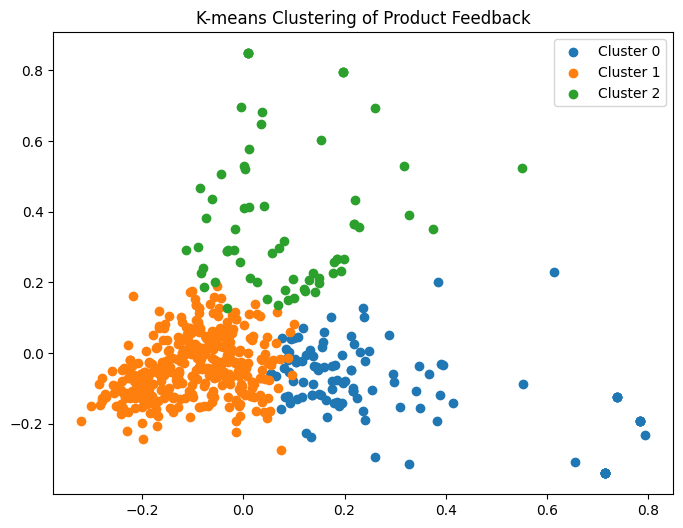

DataFrame with Sentiment:
                                              Feedbacks sentiment
0     Good packaging of the product. Product is rece...  Positive
1     Fourth time using,  Extremely good product. :-...   Neutral
2     I love it especially the smell. My hair gettin...  Negative
3     not that much good...my hairs are curly...and ...  Negative
4     I’ve been using this for about four months now...  Negative
...                                                 ...       ...
1038  I loed this combo of keratin shampoo and condi...  Negative
1039  I just got this one at the right time and i am...  Negative
1040             Fantastic product..... :- Good product  Positive
1041  Terrific Purchase! Thank you so much Wroxy for...  Negative
1043  The poduct was give a good result. :- Very Int...  Positive

[557 rows x 2 columns]

DataFrame after Removing Negative Sentiment:
                                              Feedbacks sentiment
0     Good packaging of the product. Product i

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming product_data is a DataFrame and 'Feedbacks' is the column with text data
data = product_data['Feedbacks']

# Step 1: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data)

# Step 2: Apply K-means clustering
k = 3  # Number of clusters (positive, negative, neutral)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Step 3: Add cluster labels to the DataFrame
product_data['cluster'] = kmeans.labels_

# Step 4: Analyze clusters
for cluster in range(k):
    print(f"Cluster {cluster}:")
    print(product_data[product_data['cluster'] == cluster]['Feedbacks'].head())
    print("\n")

# Step 5: Visualize clusters using PCA (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X_pca[product_data['cluster'] == cluster, 0], X_pca[product_data['cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('K-means Clustering of Product Feedback')
plt.legend()
plt.show()

# Step 6: Manually infer sentiment based on clusters
# Inspect the clusters and assign sentiment labels
sentiment_map = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}  # Update based on your cluster analysis
product_data['sentiment'] = product_data['cluster'].map(sentiment_map)

# Step 7: Display the final DataFrame with sentiment
print("DataFrame with Sentiment:")
print(product_data[['Feedbacks', 'sentiment']])

# Step 8: Remove rows with negative sentiment
product_data_cleaned = product_data[product_data['sentiment'] != 'Negative']

# Step 9: Display the cleaned DataFrame
print("\nDataFrame after Removing Negative Sentiment:")
print(product_data_cleaned[['Feedbacks', 'sentiment']])


In [ ]:
main_product = product_data_cleaned.drop(columns=['cluster', 'sentiment'])

In [ ]:
main_product

,ProductsName,Product Cost,Feedbacks,Details
0,Streax Hair Serum Vitalized With Walnut Oil (...,408.0,Good packaging of the product. Product is rece...,Let dull and frizzy hair be a story of the pas...
1,L'Oréal Professionnel X-Tenso Care Serum | For...,955.2,"Fourth time using, Extremely good product. :-...",The Prokeratin-Incell fusion recharges deplete...
6,Vedix Customised Ayurvedic Hair Fall Serum | P...,758.4,Nice 👏👏👏👍👍 :- Nice :- Poor quality serum,Ayurvedic serum that provides nourishment from...
9,WOW SKIN SCIENCE Hair Loss Control Therapy Ser...,569.6,It's amazing product for frizzy hair......I ha...,Advanced anti-hair loss serum with natural DHT...
11,"LIVON Hair Serum for Women & Men, All Hair Typ...",576.0,very very good product......this serum makes m...,"Get rid of frizzy and unmanageable hair, and e..."
...,...,...,...,...
1023,VAADI HERBALS Superbly Smoothing Heena Shampoo...,768.0,Not good :- good.👍👍👍👍👍👍👍 :- nic product this p...,The shampoo in this combination is an ideal fo...
1024,Khadi Pure Herbal Green Apple Shampoo + Condit...,334.4,Too good,Khadi Pure Gramodyog™ Herbal Green Apple Shamp...
1033,"PINKROOT Milk Protein Shampoo, Conditioner Wit...",1118.4,Nice,"Pink Root Milk Protein Shampoo, Conditioner Wi..."
1040,galway Rupabham Pro Keratin Shampoo+ Condition...,1358.4,Fantastic product..... :- Good product,With this you can keep your hair healthy and n...


In [ ]:
main_product['Details'].unique()


array(['Let dull and frizzy hair be a story of the past! Add shine to your hair anytime, anywhere using Streax Hair Serum with Walnut Oil. Enriched with the natural goodness of walnut oil and vitamin E, hair feels more manageable, silky-smooth and frizz-free.1 Hair SerumIdeal For: Men & Women Hair Type: All Hair Types For Damaged Hair Formulated For: Straightening & Smoothening',
       'The Prokeratin-Incell fusion recharges depleted moisture levels and controls volume.*  7X** stronger hair.  4X** more manageability.  4X** more hydration.  *Instrumental tests vs non conditioning shampoo.  **Instrumental shampoo + mask + leave-in vs non-conditioning shampoo.  How to use - Apply a small amount to towel-dried hair and spread evenly through lengths and ends. Do not rinse.Serum BottleIdeal For: Men & Women Sulfate Free Hair Type: Straight Hair For Chemically Treated Hair Formulated For: Straightening & Smoothening',
       'Ayurvedic serum that provides nourishment from the roots to regula

### Product recommendation based on Risk

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define risk-level specific keywords


low_risk_keywords = [
    "shine enhancement", "scalp nourishment", "vitamin-rich",
    "gentle cleansing", "moisturizing", "uv protection", "split end repair", 
    "natural oils", "hydration", "softening", "frizz control", "shine & gloss", 
    "detangling", "smoothness", "manageability", "silky-smooth", 
    "non-sticky formula", "humidity control", "lightweight", "heat protection", 
    "color protection", "daily care", "split ends prevention", "anti-frizz", 
    "straightening & smoothening", "conditioning", "nourishment", "volumizer", 
    "styling"
]


medium_risk_keywords = [
    "thickening", "volume boost", "strengthening", "follicle stimulation", "anti-breakage", "scalp revitalization",
    "keratin repair", "protein treatment", "hair growth support", "reducing hair fall", "damage repair",
    "nourishment", "conditioning", "anti-frizz", "scalp health", "hair elasticity", "hair strength", "hair repair",
    "anti-hair fall",
    "growth stimulating"
]

high_risk_keywords = [
    "follicle regeneration", "hair growth", "hair fall prevention", "nourishing repair", "damaged hair repair",
    "restorative", "regrowth", "scalp repair", "hair loss", "thinning hair", "hair restoration",
    "hair rejuvenation", 
    "intensive care", 
      "split-ends",  
      "anti-hair fall",
     "growth stimulating",
    "hair revival", "regenerating serum", "hair reactivation" 
]

low_risk_keywords = list(set(low_risk_keywords))
medium_risk_keywords = list(set(medium_risk_keywords))
high_risk_keywords = list(set(high_risk_keywords))


def recommend_product(main_product):
    # Get user risk level (using the predict_hair_fall_risk function)
    risk_level = predict_hair_fall_risk(rf_classifier, None, X_train_resampled, y_train_resampled)  # Modify as needed to return the risk level directly

    # Preprocess product details (cleaning, tokenization, vectorization)
    product_details = main_product['Details']  # Assume this is the 'Details' column from your product dataset
    vectorizer = TfidfVectorizer(stop_words='english')
    product_vectors = vectorizer.fit_transform(product_details)

    # Select keywords based on risk level
    if risk_level == "High Risk":
        keywords = high_risk_keywords
    elif risk_level == "Medium Risk":
        keywords = medium_risk_keywords
    else:
        keywords = low_risk_keywords

    # Vectorize the user's condition based on the selected keywords
    user_condition_vector = vectorizer.transform(keywords)

    # Compute the cosine similarity between the user's keywords and product details
    similarity_scores = cosine_similarity(user_condition_vector, product_vectors)

    # Get the indices of the top 5 products based on the highest similarity scores
    avg_similarity_scores = similarity_scores.mean(axis=0)  # Calculate the average similarity for each product
    top_5_indices = np.argsort(avg_similarity_scores)[::-1][:5]  # Sort and get the top 5 products

    # Print details of the top 5 recommended products
    print(f"Top 5 Recommended Products for Your Risk Level: {risk_level}\n")
    
    for i, idx in enumerate(top_5_indices):
        recommended_product = main_product.iloc[idx]
        print(f"Rank {i+1}: {recommended_product['ProductsName']}")
        print(f"Cost: {recommended_product['Product Cost']}")
        print(f"Product Feedback: {recommended_product['Feedbacks']}")
        print('-' * 80)
    return top_5_indices



In [ ]:
main_product.to_csv('main_product.csv', index=False)

### Recommendation based on Content based filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_content_recommendations(selected_product_name, product_data, n_recommendations=5):
    """
    Provides collaborative filtering based recommendations after user selects a product.
    
    Parameters:
    selected_product_name: Name of the product selected by user from initial recommendations
    product_data: DataFrame with columns [ProductsName, Product Cost, Feedbacks, Details]
    n_recommendations: Number of recommendations to return
    
    Returns:
    DataFrame containing recommended products
    """
    # Create item features matrix using Details column
    vectorizer = TfidfVectorizer(stop_words='english')
    item_features = vectorizer.fit_transform(product_data['Details'])
    
    # Calculate item-item similarity matrix
    item_similarity = cosine_similarity(item_features)
    item_similarity_df = pd.DataFrame(
        item_similarity,
        index=product_data['ProductsName'],
        columns=product_data['ProductsName']
    )
    
    # Get similar products
    similar_scores = item_similarity_df[selected_product_name].sort_values(ascending=False)
    similar_products = similar_scores.index[1:n_recommendations+1].tolist()
    
    # Get full details of recommended products
    recommendations = product_data[product_data['ProductsName'].isin(similar_products)].copy()
    
    # Add similarity score to recommendations
    recommendations['SimilarityScore'] = recommendations['ProductsName'].map(similar_scores)
    
    # Sort by similarity score
    recommendations = recommendations.sort_values('SimilarityScore', ascending=False)
    
    return recommendations

def display_collaborative_recommendations(recommendations):
    """
    Displays the collaborative filtering recommendations in a formatted way.
    
    Parameters:
    recommendations: DataFrame containing recommended products
    """
    print("\nBased on your selection, you might also like:\n")
    for idx, row in recommendations.iterrows():
        print(f"Product: {row['ProductsName']}")
        print(f"Cost: {row['Product Cost']}")
        print(f"Product Feedback: {row['Feedbacks']}")
        print(f"Similarity Score: {row['SimilarityScore']:.2f}")
        print('-' * 80)

def complete_recommendation_workflow(product_data):
    """
    Complete workflow combining initial risk-based recommendations and collaborative filtering.
    """
    # Get top 5 recommended product indices
    top_5_indices = recommend_product(product_data)  

    if not isinstance(top_5_indices, (list, np.ndarray)) or len(top_5_indices) == 0:
        print("No recommendations available. Please try again.")
        return
    
    # Get user selection
    while True:
        try:
            selected_rank = int(input(f"\nPlease select a product by entering its rank (1-{min(5, len(top_5_indices))}): "))
            if 1 <= selected_rank <= min(5, len(top_5_indices)):
                break
            print(f"Please enter a number between 1 and {min(5, len(top_5_indices))}.")
        except ValueError:
            print("Please enter a valid number.")

    # Get the selected product's name using `.iloc`
    selected_product_name = product_data.iloc[top_5_indices[selected_rank-1]]['ProductsName']

    # Get and display collaborative recommendations
    collab_recommendations = get_content_recommendations(selected_product_name, product_data)
    display_collaborative_recommendations(collab_recommendations)


### Hybrid Recommendation

In [ ]:


def get_user_collaborative_recommendations(selected_product_name, product_data, n_recommendations=5):
    """
    Provides user-collaborative filtering recommendations based on product feedback patterns.
    
    Parameters:
    selected_product_name: Name of the product selected by user
    product_data: DataFrame with columns [ProductsName, Product Cost, Feedbacks, Details]
    n_recommendations: Number of recommendations to return
    
    Returns:
    DataFrame containing recommended products
    """
    # Create item-feedback matrix using the Feedbacks column
    vectorizer = TfidfVectorizer(stop_words='english')
    feedback_features = vectorizer.fit_transform(product_data['Feedbacks'].astype(str))
    
    # Calculate item-item similarity based on feedback patterns
    feedback_similarity = cosine_similarity(feedback_features)
    feedback_similarity_df = pd.DataFrame(
        feedback_similarity,
        index=product_data['ProductsName'],
        columns=product_data['ProductsName']
    )
    
    # Get similar products based on feedback patterns
    similar_scores = feedback_similarity_df[selected_product_name].sort_values(ascending=False)
    similar_products = similar_scores.index[1:n_recommendations+1].tolist()
    
    # Get full details of recommended products
    recommendations = product_data[product_data['ProductsName'].isin(similar_products)].copy()
    recommendations['CollaborativeScore'] = recommendations['ProductsName'].map(similar_scores)
    
    return recommendations.sort_values('CollaborativeScore', ascending=False)

def get_hybrid_recommendations(content_recommendations, collab_recommendations, product_data, weight_content=0.5):
    """
    Combines content-based and feedback-based recommendations.
    
    Parameters:
    content_recommendations: DataFrame with content-based recommendations
    collab_recommendations: DataFrame with feedback-based recommendations
    product_data: Original product data
    weight_content: Weight for content-based recommendations (0-1)
    
    Returns:
    DataFrame with hybrid recommendations
    """
    # Normalize similarity scores
    content_recommendations['NormalizedContentScore'] = (
        content_recommendations['SimilarityScore'] - content_recommendations['SimilarityScore'].min()
    ) / (content_recommendations['SimilarityScore'].max() - content_recommendations['SimilarityScore'].min())
    
    collab_recommendations['NormalizedCollabScore'] = (
        collab_recommendations['CollaborativeScore'] - collab_recommendations['CollaborativeScore'].min()
    ) / (collab_recommendations['CollaborativeScore'].max() - collab_recommendations['CollaborativeScore'].min())
    
    # Combine recommendations
    hybrid_recommendations = pd.concat([
        content_recommendations[['ProductsName', 'NormalizedContentScore']],
        collab_recommendations[['ProductsName', 'NormalizedCollabScore']]
    ], axis=0)
    
    # Calculate hybrid score
    hybrid_recommendations['HybridScore'] = hybrid_recommendations['NormalizedContentScore'].fillna(0) * weight_content + \
                                          hybrid_recommendations['NormalizedCollabScore'].fillna(0) * (1 - weight_content)
    
    # Get unique products with highest hybrid scores
    hybrid_recommendations = hybrid_recommendations.groupby('ProductsName')['HybridScore'].max().reset_index()
    hybrid_recommendations = hybrid_recommendations.sort_values('HybridScore', ascending=False)
    
    # Get full product details
    final_recommendations = product_data[product_data['ProductsName'].isin(hybrid_recommendations['ProductsName'])].copy()
    final_recommendations['HybridScore'] = final_recommendations['ProductsName'].map(
        hybrid_recommendations.set_index('ProductsName')['HybridScore']
    )
    
    return final_recommendations.sort_values('HybridScore', ascending=False)

def display_recommendations(recommendations, recommendation_type="Recommendations"):
    """
    Displays recommendations in a formatted way.
    
    Parameters:
    recommendations: DataFrame containing recommended products
    recommendation_type: String indicating the type of recommendations being displayed
    """
    print(f"\n{recommendation_type}:\n")
    for idx, row in recommendations.iterrows():
        print(f"Product: {row['ProductsName']}")
        print(f"Cost: {row['Product Cost']}")
        print(f"Product Feedback: {row['Feedbacks']}")
        score_type = 'HybridScore' if 'HybridScore' in row else \
                    'CollaborativeScore' if 'CollaborativeScore' in row else 'SimilarityScore'
        
        print('-' * 80)

def complete_hybrid_recommendation_workflow(product_data):
    """
    Complete workflow combining content-based, feedback-based, and hybrid recommendations.
    
    Parameters:
    user_input: User's initial input for content-based filtering
    product_data: DataFrame with product information
    """
    # Get initial content-based recommendations
    top_5_indices = recommend_product(product_data)
    
    if not isinstance(top_5_indices, (list, np.ndarray)) or len(top_5_indices) == 0:
        print("No recommendations available. Please try again.")
        return
    
    # Get user selection for content-based recommendations
    while True:
        try:
            selected_rank = int(input(f"\nPlease select a product by entering its rank (1-{min(5, len(top_5_indices))}): "))
            if 1 <= selected_rank <= min(5, len(top_5_indices)):
                break
            print(f"Please enter a number between 1 and {min(5, len(top_5_indices))}.")
        except ValueError:
            print("Please enter a valid number.")
    
    # Get selected product name
    selected_product_name = product_data.iloc[top_5_indices[selected_rank-1]]['ProductsName']
    
    # Get content-based recommendations
    content_recommendations = get_content_recommendations(selected_product_name, product_data)
    display_recommendations(content_recommendations, "Content-based Recommendations")
    
    # Get feedback-based recommendations
    collab_recommendations = get_user_collaborative_recommendations(selected_product_name, product_data)
    display_recommendations(collab_recommendations, "collaborative-based Recommendations")
    
    # Get hybrid recommendations
    hybrid_recommendations = get_hybrid_recommendations(content_recommendations, collab_recommendations, product_data)
    display_recommendations(hybrid_recommendations, "Hybrid Recommendations")


In [ ]:
complete_hybrid_recommendation_workflow(main_product)

Please enter the following details:


c:\Users\Nitro\anaconda3\envs\test_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Predicted Hair Fall Risk: High Risk
Estimated Age When Hair Fall Might Start: 14.14
Estimated Age When Hair Fall Might Start: 14 years and 2 months
Top 5 Recommended Products for Your Risk Level: High Risk

Rank 1: Vedix Customised Ayurvedic Hair Fall Serum | Prachay Serum For Moderate Hair Fall | With Green Tea + Ginseng + Moringa | For Reducing Hair Fall | For Hair Growth | 30ml  (30 ml)
Cost: 758.4000000000001
Product Feedback: Nice 👏👏👏👍👍 :- Nice :- Poor quality serum
--------------------------------------------------------------------------------
Rank 2: Wroxy Onion Hair Serum For Silky & Smooth Hair  (50 ml)
Cost: 398.4
Product Feedback: This product is very good
--------------------------------------------------------------------------------
Rank 3: Aaryanveda Vitalized with Walnut Oil Hair Serum for Hair Growth (Pack of 2)  (145 ml)
Cost: 411.2000000000001
Product Feedback: Really superb product worth of money thank you Flipkart :- It's a very awesome product..loved it❤️ :- Not

In [ ]:
main_data.to_csv('hairfall_dataset.csv', index=False)
main_product.to_csv('products.csv', index=False)

In [ ]:
import joblib 
joblib.dump(best_rf_model, 'hair_fall_risk_model_tuned.pkl')

['hair_fall_risk_model_tuned.pkl']

In [ ]:
joblib.dump(best_model, 'age_prediction_model_tuned.pkl')

['age_prediction_model_tuned.pkl']

In [ ]:
main_product['status'] = 'Approved'